In [ ]:
#1) Prepare a classification model using SVM for salary data

#Data Description:

#age -- age of a person
#workclass	-- A work class is a grouping of work
#education	-- Education of an individuals
#maritalstatus -- Marital status of an individulas
#occupation	 -- occupation of an individuals
#relationship --
#race --  Race of an Individual
#sex --  Gender of an Individual
#capitalgain --  profit received from the sale of an investment
#capitalloss	-- A decrease in the value of a capital asset
#hoursperweek -- number of hours work per week
#native -- Native of an individual
#Salary -- salary of an individual

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
data = pd.read_csv('SalaryData_Test(1).csv')

In [3]:
# Display the first few rows of the dataset to understand its structure
print(data.head())

   age   workclass      education  educationno        maritalstatus  \
0   25     Private           11th            7        Never-married   
1   38     Private        HS-grad            9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44     Private   Some-college           10   Married-civ-spouse   
4   34     Private           10th            6        Never-married   

           occupation    relationship    race    sex  capitalgain  \
0   Machine-op-inspct       Own-child   Black   Male            0   
1     Farming-fishing         Husband   White   Male            0   
2     Protective-serv         Husband   White   Male            0   
3   Machine-op-inspct         Husband   Black   Male         7688   
4       Other-service   Not-in-family   White   Male            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            50   United-States   <

In [4]:
# Drop any missing values if necessary
data = data.dropna()

In [5]:
# Convert categorical columns to numerical using Label Encoding
label_encoder = LabelEncoder()
categorical_columns = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [6]:
# Separate features and target variable
X = data.drop('Salary', axis=1)
y = data['Salary']

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Initialize the SVM model
svm_model = SVC()

In [9]:
# Train the SVM model
svm_model.fit(X_train, y_train)

SVC()

In [10]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

In [11]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 79.18%


In [12]:
# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.97      0.87      2246
           1       0.75      0.27      0.40       766

    accuracy                           0.79      3012
   macro avg       0.77      0.62      0.64      3012
weighted avg       0.78      0.79      0.75      3012



In [13]:
# Initialize SVM models with different kernels
svm_linear = SVC(kernel='linear')
svm_poly = SVC(kernel='poly')
svm_sigmoid = SVC(kernel='sigmoid')
svm_rbf = SVC(kernel='rbf')

In [14]:
# Use RBFSampler for kernel approximation
rbf_feature = RBFSampler(gamma=1, random_state=1)
X_train_transformed = rbf_feature.fit_transform(X_train)
X_test_transformed = rbf_feature.transform(X_test)


In [15]:
# Create a linear SVM model with SGDClassifier
svm_approx = make_pipeline(SGDClassifier(max_iter=1000, tol=1e-3))
svm_approx.fit(X_train_transformed, y_train)


Pipeline(steps=[('sgdclassifier', SGDClassifier())])

In [16]:
# Make predictions
y_pred_approx = svm_approx.predict(X_test_transformed)


In [17]:
# Evaluate the model
accuracy_approx = accuracy_score(y_test, y_pred_approx)
print(f"Accuracy (Approximated Kernel): {accuracy_approx * 100:.2f}%")


Accuracy (Approximated Kernel): 74.57%


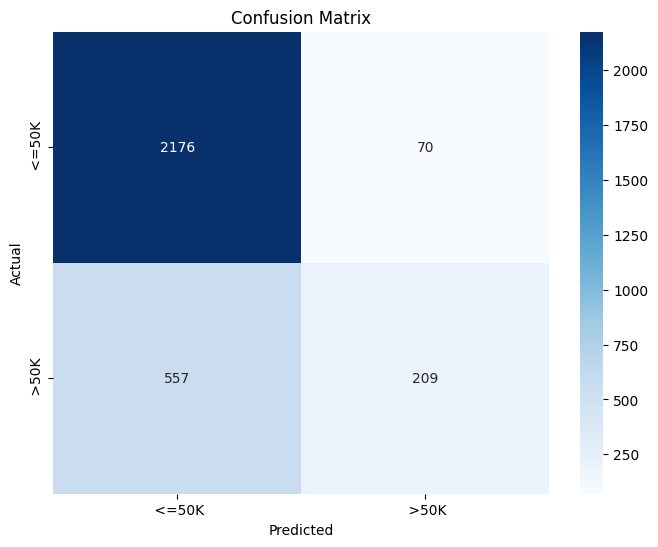

In [18]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

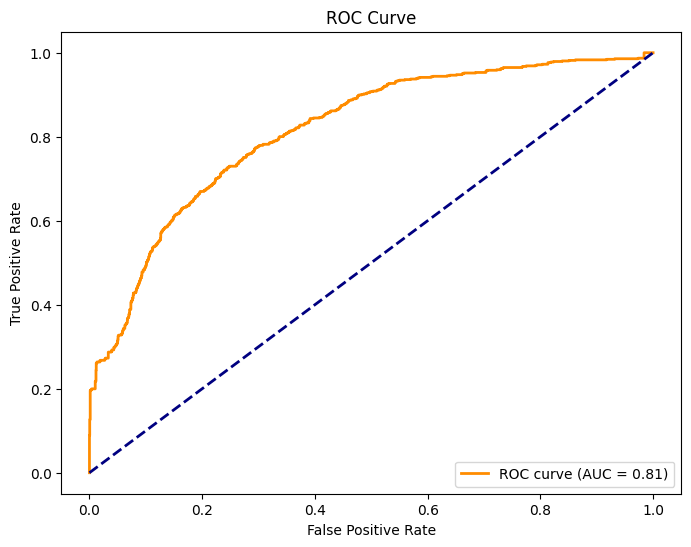

In [19]:
#Plot the Receiver Operating Characteristic (ROC) curve to visualize the trade-off between sensitivity and specificity.
y_probs = svm_model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()